In [46]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
%matplotlib inline

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler

pd.pandas.set_option('display.max_columns', None)

In [47]:
df = pd.read_csv('./data/sample.csv')
print(df.shape)
df.head()

(29236, 18)


,Unnamed: 0,VendorID,tpep_pickup_datetime,tpep_dropoff_datetime,passenger_count,trip_distance,RatecodeID,store_and_fwd_flag,PULocationID,DOLocationID,payment_type,fare_amount,extra,mta_tax,tip_amount,tolls_amount,improvement_surcharge,total_amount
0,2466149,2,2017-03-06 12:10:08,2017-03-06 12:20:21,2,2.03,1,N,140,236,1,9.0,0.0,0.5,1.96,0.0,0.3,11.76
1,3406713,1,2017-06-14 08:11:30,2017-06-14 08:14:38,1,0.40,1,N,43,142,1,4.5,0.0,0.5,1.05,0.0,0.3,6.35
2,7071298,2,2017-11-22 19:42:47,2017-11-22 19:49:49,3,1.04,1,N,151,238,1,6.5,1.0,0.5,0.00,0.0,0.3,8.30
3,3845741,2,2017-11-12 16:58:55,2017-11-12 17:09:24,1,1.79,1,N,239,236,2,9.5,0.0,0.5,0.00,0.0,0.3,10.30
4,3672997,1,2017-06-14 22:01:39,2017-06-14 22:06:32,1,1.20,1,N,246,246,1,6.0,0.5,0.5,2.15,0.0,0.3,9.45


In [48]:
# train, test split
# set seed for reproducibility 

X_train, X_test, y_train, y_test = train_test_split(df, df.tip_amount,
                                                    test_size=0.1,
                                                    random_state=0)

X_train.shape, X_test.shape, y_train.shape, y_test.shape

((26312, 18), (2924, 18), (26312,), (2924,))

In [49]:
df.columns

Index(['Unnamed: 0', 'VendorID', 'tpep_pickup_datetime',
       'tpep_dropoff_datetime', 'passenger_count', 'trip_distance',
       'RatecodeID', 'store_and_fwd_flag', 'PULocationID', 'DOLocationID',
       'payment_type', 'fare_amount', 'extra', 'mta_tax', 'tip_amount',
       'tolls_amount', 'improvement_surcharge', 'total_amount'],
      dtype='object')

### Time variable

In [54]:
def trip_time(df, start, end):
    """
    start: pickup time
    end: dropoff time
    
    Extracts time information from the two variables. 
    """
    df = df.copy()
    
    df['pickup'] = pd.to_datetime(df[start])
    df['dropoff'] = pd.to_datetime(df[end])
    
    df['trip_time'] = df['dropoff'] - df['pickup']
    
    # convert to minutes
    # df['trip_time'] = df['trip_time'].dt.minute
    
    print(df['trip_time'].dtype)
    
    df = df.drop(columns=[start, end])
    
    return df

In [55]:
X_train = trip_time(df, 'tpep_pickup_datetime', 'tpep_dropoff_datetime')
X_test = trip_time(df, 'tpep_pickup_datetime', 'tpep_dropoff_datetime')

timedelta64[ns]
timedelta64[ns]


### Numerical variables
- Log transform those without zeros to get a more Gaussian distribution to help linear machine learning models

In [43]:
# remove negative values columns where it is not possible to have negative values
cols = ['fare_amount', 'extra', 'mta_tax', 'tip_amount', 'tolls_amount', 'improvement_surcharge', 'total_amount']
for col in cols:
    X_train = X_train[X_train[col] >= 0]
    X_test = X_test[X_test[col] >= 0]
    
# remove zero values from where it is not possible to have zero values
cols = ['fare_amount', 'total_amount']
for col in cols:
    X_train = X_train[X_train[col] > 0]
    X_test = X_test[X_test[col] > 0]
    
X_train.describe()

,Unnamed: 0,VendorID,passenger_count,trip_distance,RatecodeID,PULocationID,DOLocationID,payment_type,fare_amount,extra,mta_tax,tip_amount,tolls_amount,improvement_surcharge,total_amount
count,2.628500e+04,26285.000000,26285.000000,26285.000000,26285.000000,26285.000000,26285.000000,26285.000000,26285.000000,26285.000000,26285.000000,26285.000000,26285.000000,26285.000000,26285.000000
mean,4.904348e+06,1.540765,1.628457,2.951017,1.046072,162.748830,161.293437,1.326384,21.455508,0.333536,0.497755,1.889499,0.336797,0.299966,24.816891
std,2.823298e+06,0.498345,1.267092,3.809426,0.672503,66.481127,70.191534,0.486969,1346.549625,0.447196,0.033426,2.690092,1.505241,0.003205,1346.560586
min,2.700000e+02,1.000000,0.000000,0.000000,1.000000,1.000000,1.000000,1.000000,0.010000,0.000000,0.000000,0.000000,0.000000,0.000000,0.310000
25%,2.473164e+06,1.000000,1.000000,0.980000,1.000000,114.000000,112.000000,1.000000,6.500000,0.000000,0.500000,0.000000,0.000000,0.300000,8.750000
50%,4.912091e+06,2.000000,1.000000,1.600000,1.000000,162.000000,162.000000,1.000000,9.500000,0.000000,0.500000,1.360000,0.000000,0.300000,11.800000
75%,7.330276e+06,2.000000,2.000000,3.030000,1.000000,233.000000,233.000000,2.000000,15.000000,0.500000,0.500000,2.460000,0.000000,0.300000,17.850000
max,1.029388e+07,2.000000,6.000000,72.680000,99.000000,265.000000,265.000000,4.000000,218316.300000,4.500000,0.500000,100.300000,25.000000,0.300000,218317.090000


In [36]:
# log transform numeric variables that do not contain zeros
for var in ['fare_amount', 'total_amount']:
    X_train[var] = np.log(X_train[var])
    X_test[var] = np.log(X_test[var])

TypeError: ufunc 'log' not supported for the input types, and the inputs could not be safely coerced to any supported types according to the casting rule ''safe''

### Categorical variables
- convert strings to numbers to capture monotonic relationship between label and target

In [13]:
# for one hot encoding
# a few variables have been coded as an int instead of a categorical variable
var_to_str = ['RatecodeID', 'store_and_fwd_flag', 'payment_type']

def to_str(train, test, var):
    train[var] = train[var].astype(str)
    test[var] = test[var].astype(str)
    
for var in var_to_str:
    to_str(X_train, X_test, var)

In [14]:
# check cardinality of non-numeric features we want to one-hot encode
X_train.describe(include='O').T.sort_values(by='unique')

,count,unique,top,freq
store_and_fwd_flag,29236,2,N,29082
payment_type,29236,4,1,19899
RatecodeID,29236,6,1,28373


In [15]:
X_train.RatecodeID.value_counts(normalize=False)

1     28373
2       676
5       106
3        65
4        15
99        1
Name: RatecodeID, dtype: int64

In [16]:
X_train.payment_type.value_counts(normalize=False)

1    19899
2     9142
3      144
4       51
Name: payment_type, dtype: int64

In [19]:
# need to reduce cardinality of PULocationID & DOLocationID
X_train.PULocationID.value_counts().sum

# get list of top 10 locations
top10PU = X_train['PULocationID'].value_counts()[:10].index
top10DO = X_train['DOLocationID'].value_counts()[:10].index

# for locationIDs not in the top 10, replace with OTHER
X_train.loc[~X_train['PULocationID'].isin(top10PU), 'PULocationID'] = 'OTHER'
X_train.loc[~X_train['DOLocationID'].isin(top10DO), 'DOLocationID'] = 'OTHER'

X_test.loc[~X_test['PULocationID'].isin(top10PU), 'PULocationID'] = 'OTHER'
X_test.loc[~X_test['DOLocationID'].isin(top10DO), 'DOLocationID'] = 'OTHER'

In [22]:
import category_encoders as ce

encoder = ce.OneHotEncoder(use_cat_names=True)

X_train['RatecodeID'] = X_train['RatecodeID'].replace({'1': 'one', '2': 'two', '3': 'three', '4': 'four', '5': 'five', '99': 'six'})
X_test['RatecodeID'] = X_test['RatecodeID'].replace({'1': 'one', '2': 'two', '3': 'three', '4': 'four', '5': 'five', '99': 'six'})

X_train['store_and_fwd_flag'] = X_train['store_and_fwd_flag'].replace({'1': 'one', '2': 'two'})
X_test['store_and_fwd_flag'] = X_test['store_and_fwd_flag'].replace({'1': 'one', '2': 'two'})

X_train['payment_type'] = X_train['payment_type'].replace({'1': 'one', '2': 'two', '3': 'three', '4': 'four'})
X_test['payment_type'] = X_test['payment_type'].replace({'1': 'one', '2': 'two', '3': 'three', '4': 'four'})

X_train_encoded = encoder.fit_transform(X_train)
X_test_encoded = encoder.fit_transform(X_test)

X_train_encoded.head()

,Unnamed: 0,VendorID,passenger_count,trip_distance,RatecodeID_one,RatecodeID_two,RatecodeID_four,RatecodeID_three,RatecodeID_five,RatecodeID_six,store_and_fwd_flag_N,store_and_fwd_flag_Y,PULocationID_OTHER,PULocationID_170,PULocationID_142,PULocationID_236,PULocationID_230,PULocationID_186,PULocationID_162,PULocationID_237,PULocationID_161,PULocationID_234,PULocationID_48,DOLocationID_236,DOLocationID_142,DOLocationID_OTHER,DOLocationID_230,DOLocationID_186,DOLocationID_48,DOLocationID_237,DOLocationID_161,DOLocationID_234,DOLocationID_162,DOLocationID_170,payment_type_one,payment_type_two,payment_type_three,payment_type_four,fare_amount,extra,mta_tax,tip_amount,tolls_amount,improvement_surcharge,total_amount,pickup,dropoff,trip_time
0,2466149,2,2,2.03,1,0,0,0,0,0,1,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,9.0,0.0,0.5,1.96,0.0,0.3,11.76,2017-03-06 12:10:08,2017-03-06 12:20:21,00:10:13
1,3406713,1,1,0.40,1,0,0,0,0,0,1,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,4.5,0.0,0.5,1.05,0.0,0.3,6.35,2017-06-14 08:11:30,2017-06-14 08:14:38,00:03:08
2,7071298,2,3,1.04,1,0,0,0,0,0,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,6.5,1.0,0.5,0.00,0.0,0.3,8.30,2017-11-22 19:42:47,2017-11-22 19:49:49,00:07:02
3,3845741,2,1,1.79,1,0,0,0,0,0,1,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,9.5,0.0,0.5,0.00,0.0,0.3,10.30,2017-11-12 16:58:55,2017-11-12 17:09:24,00:10:29
4,3672997,1,1,1.20,1,0,0,0,0,0,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,6.0,0.5,0.5,2.15,0.0,0.3,9.45,2017-06-14 22:01:39,2017-06-14 22:06:32,00:04:53


In [23]:
cat_vars = [var for var in X_train.columns if X_train[var].dtype == 'O']
cat_vars

['RatecodeID',
 'store_and_fwd_flag',
 'PULocationID',
 'DOLocationID',
 'payment_type']

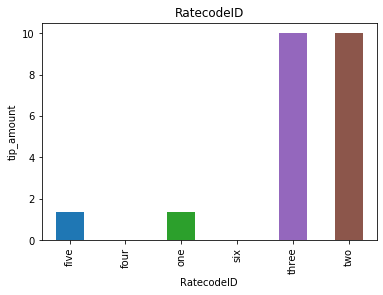

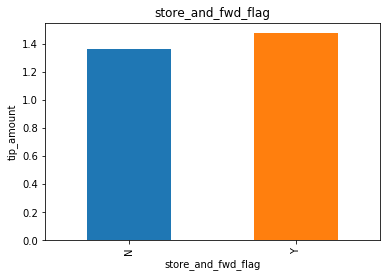

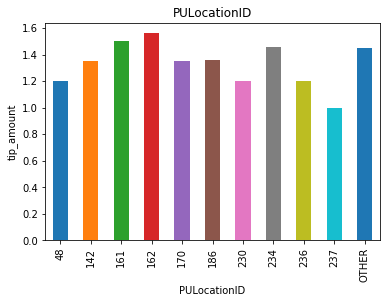

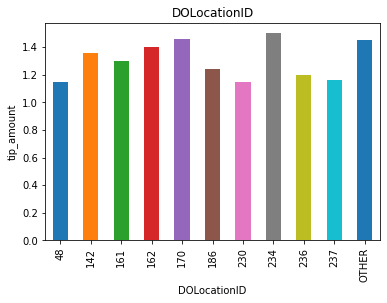

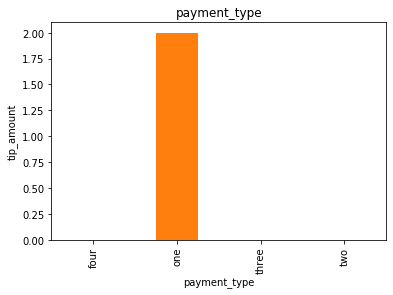

In [25]:
# is there a monotonic relationship between the labels and tip amount?
def analyse_vars(df, var):
    df = df.copy()
    df.groupby(var)['tip_amount'].median().plot.bar()
    plt.title(var)
    plt.ylabel('tip_amount')
    plt.show()
    
for var in cat_vars:
    analyse_vars(X_train, var)

### Feature scaling
- for linear models

In [29]:
features = [var for var in X_train_encoded.columns if var not in ['tip_amount']]

len(features)

47

In [ ]:
scaler = MinMaxScaler()
scaler.fit(X_train_encoded[features])